In [11]:
## Working thorugh http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb

import scipy.stats as stats

dist = stats.beta

In [12]:
%matplotlib inline

In [13]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
## rvs - random variates of the dist
dataUnbiased = stats.bernoulli.rvs(0.5, size=n_trials[-1])
dataBiased = stats.bernoulli.rvs(0.1, size=n_trials[-1])

In [ ]:
dataBiased.sum(), dataUnbiased.sum()

In [ ]:
figsize(11, 9)
x = np.linspace(0,1, 100) # get a numpy array of 100 evenly spaced points between0 and 1

In [ ]:
for k,N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads")
    plt.setp(sx.get_yticklabels(), visible = False)
    #Fit a beta distribution to the data and plot
    heads = dataBiased[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)  #conjugate beta dist
    plt.plot(x, y)
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)

In [ ]:
figsize(12.5,4)
p = np.linspace(0,1,50)
plt.plot(p, (2 * p) / (1 + p))

In [ ]:
##Lower the prioer is, the bigger the information gain

In [ ]:
##Exploring the poisson distrbution
x = np.arange(16)
poi = stats.poisson
lambdas = [3, 8]
colours = [ "red", "blue", "green", "yellow"]
alpha = 0.5

for i in range(len(lambdas)):
    plt.bar(x, poi.pmf(x, lambdas[i]), alpha = alpha, color = colours[i])

In [ ]:
expo = stats.expon 
a = np.linspace(0,4,100)
plt.plot(a, expo.pdf(a, scale = 1./ 0.5))
plt.plot(a, expo.pdf(a, scale = 1./ 1.))

In [14]:
data = np.array([1.300000000000000000e+01,
2.400000000000000000e+01,
8.000000000000000000e+00,
2.400000000000000000e+01,
7.000000000000000000e+00,
3.500000000000000000e+01,
1.400000000000000000e+01,
1.100000000000000000e+01,
1.500000000000000000e+01,
1.100000000000000000e+01,
2.200000000000000000e+01,
2.200000000000000000e+01,
1.100000000000000000e+01,
5.700000000000000000e+01,
1.100000000000000000e+01,
1.900000000000000000e+01,
2.900000000000000000e+01,
6.000000000000000000e+00,
1.900000000000000000e+01,
1.200000000000000000e+01,
2.200000000000000000e+01,
1.200000000000000000e+01,
1.800000000000000000e+01,
7.200000000000000000e+01,
3.200000000000000000e+01,
9.000000000000000000e+00,
7.000000000000000000e+00,
1.300000000000000000e+01,
1.900000000000000000e+01,
2.300000000000000000e+01,
2.700000000000000000e+01,
2.000000000000000000e+01,
6.000000000000000000e+00,
1.700000000000000000e+01,
1.300000000000000000e+01,
1.000000000000000000e+01,
1.400000000000000000e+01,
6.000000000000000000e+00,
1.600000000000000000e+01,
1.500000000000000000e+01,
7.000000000000000000e+00,
2.000000000000000000e+00,
1.500000000000000000e+01,
1.500000000000000000e+01,
1.900000000000000000e+01,
7.000000000000000000e+01,
4.900000000000000000e+01,
7.000000000000000000e+00,
5.300000000000000000e+01,
2.200000000000000000e+01,
2.100000000000000000e+01,
3.100000000000000000e+01,
1.900000000000000000e+01,
1.100000000000000000e+01,
1.800000000000000000e+01,
2.000000000000000000e+01,
1.200000000000000000e+01,
3.500000000000000000e+01,
1.700000000000000000e+01,
2.300000000000000000e+01,
1.700000000000000000e+01,
4.000000000000000000e+00,
2.000000000000000000e+00,
3.100000000000000000e+01,
3.000000000000000000e+01,
1.300000000000000000e+01,
2.700000000000000000e+01,
0.000000000000000000e+00,
3.900000000000000000e+01,
3.700000000000000000e+01,
5.000000000000000000e+00,
1.400000000000000000e+01,
1.300000000000000000e+01,
2.200000000000000000e+01])

In [10]:
len(data)

NameError: name 'data' is not defined

In [ ]:
plt.bar(np.arange(len(data)), data)

In [ ]:
dist = stats.poisson
dist.pmf

In [5]:
alpha = sum(data) / len(data)

NameError: name 'data' is not defined

In [ ]:
alpha

In [4]:
import pymc as pm

In [18]:
alpha = 1.0 / data.mean()
lambda_1 = pm.Exponential("lambda_early", alpha)
lambda_2 = pm.Exponential("lambda_late", alpha)

tau = pm.DiscreteUniform("tau", lower = 0, upper = len(data))

In [23]:
tau.random()

array(40)

In [25]:
data

array([ 13.,  24.,   8.,  24.,   7.,  35.,  14.,  11.,  15.,  11.,  22.,
        22.,  11.,  57.,  11.,  19.,  29.,   6.,  19.,  12.,  22.,  12.,
        18.,  72.,  32.,   9.,   7.,  13.,  19.,  23.,  27.,  20.,   6.,
        17.,  13.,  10.,  14.,   6.,  16.,  15.,   7.,   2.,  15.,  15.,
        19.,  70.,  49.,   7.,  53.,  22.,  21.,  31.,  19.,  11.,  18.,
        20.,  12.,  35.,  17.,  23.,  17.,   4.,   2.,  31.,  30.,  13.,
        27.,   0.,  39.,  37.,   5.,  14.,  13.,  22.])

In [27]:
@pm.deterministic
def lambda_(tau = tau, lambda_1 = lambda_1, lambda_2 = lambda_2):
    out = np.zeros(len(data))
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

In [28]:
observation = pm.Poisson("obs", lambda_, value = data, observed = True)


In [29]:
model = pm.Model([observation, lambda_1, lambda_2, tau])

In [30]:
model

In [31]:
mcmc = pm.MCMC(model)

In [32]:
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 5.5 sec

In [38]:
#extract the samples for different variables
lambda_early_samples = mcmc.trace('lambda_early')[:]
lambda_2_samples = mcmc.trace('lambda_late')[:]
tau_samples = mcmc.trace('tau')[:]

(35, 55)

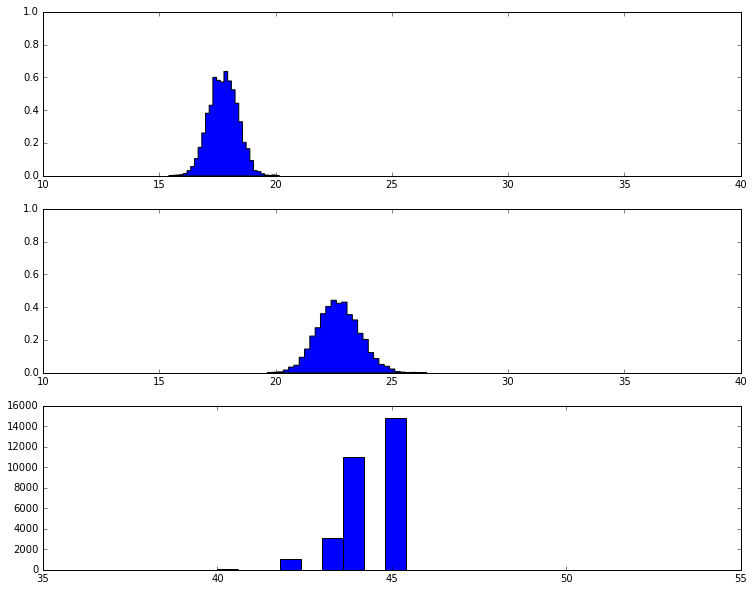

In [52]:
figsize(12.5, 10)
ax = plt.subplot(311)
plt.hist(lambda_early_samples, bins = 30, histtype='stepfilled', normed=True)
plt.xlim([10,40])
plt.ylim([0,1])
ax = plt.subplot(312)
plt.hist(lambda_2_samples, normed = True, bins = 30, histtype = "stepfilled")
plt.xlim([10,40])
plt.ylim([0,1])
ax = plt.subplot(313)
plt.hist(tau_samples, bins = )
plt.xlim([35, 55])